# Final Project

## Python for Data Analysis Training Program

Written by Team "Diversity-in-Tech" in March-April 2020

## 1. Introduction

_Instructions from Final_Project.pdf:_
- Introduces the reader to the topic and the broad context within which your project fits
- What do you hope to learn from the project?
- What question is being addressed?
- Why is this important? (motivation)

## 2. Dataset

_Instructions from Final_Project.pdf:_
- Briefly describe your data

The dataset can be found at: https://github.com/tarasiegel/women-in-tech/raw/master/data/companies.csv

## 3. Preprocessing

_Instructions from Final_Project.pdf:_
- Explain your whole approach

### 3.1 Preparing the Dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the CSV file
url_tech = 'https://github.com/tarasiegel/women-in-tech/raw/master/data/companies.csv'

In [3]:
# Reading the file
tech = pd.read_csv(url_tech, index_col=[0])

In [4]:
# Checking the contents
tech.head()

,Company,Num. of Female Engineers,male_eng,Total Engineers,Percent Female Engineers,Total Employees,Location,Funding (Mil),Category,Website,grace_hopper
key,,,,,,,,,,,
37signals,37signals,0,20,20,0.00,20.0,IL,0.00,Software,http://www.37signals.com,NaN
7digital,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,http://www.7digital.com,NaN
activision,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,http://www.activison.com,NaN
adzerk,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,http://www.adzerk.com,NaN
airbnb,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,http://www.airbnb.com,YES


In [5]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 37signals to zerocater
Data columns (total 11 columns):
Company                     122 non-null object
Num. of Female Engineers    122 non-null int64
male_eng                    122 non-null int64
Total Engineers             122 non-null int64
Percent Female Engineers    122 non-null float64
Total Employees             121 non-null float64
Location                    120 non-null object
Funding (Mil)               121 non-null float64
Category                    121 non-null object
Website                     121 non-null object
grace_hopper                9 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 11.4+ KB


In [6]:
tech.shape

(122, 11)

In [7]:
# Describing the dataset
tech.describe()

,Num. of Female Engineers,male_eng,Total Engineers,Percent Female Engineers,Total Employees,Funding (Mil)
count,122.000000,122.000000,122.000000,122.000000,121.000000,121.000000
mean,8.819672,62.795082,71.614754,16.571885,296.752066,78.820529
std,50.035032,355.165005,405.057009,16.678773,1535.100981,422.906491
min,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
25%,1.000000,6.000000,7.000000,6.260000,25.000000,0.650000
50%,2.000000,16.000000,18.500000,13.535000,66.000000,10.500000
75%,5.000000,29.000000,34.250000,21.072500,162.000000,31.200000
max,553.000000,3907.000000,4460.000000,100.000000,16779.000000,4596.067000


### 3.2 Data Cleaning

In this section the unnecessary columns and a sum row are dropped. Some columns are also renamed to improve the data's usability. The dataframe's contents are made uniform as well. 

In [8]:
# Drop unnecessary columns off
tech = tech.drop(columns=['Website'])
tech = tech.drop(columns=['grace_hopper'])

In [9]:
# Renaming columns
tech = tech.rename(columns = {"Num. of Female Engineers": "female_eng", "Total Engineers": "total_eng", "Percent Female Engineers": "PC_female_eng", "Total Employees": "total_employees", "Funding (Mil)": "funding_Mil"})

In [10]:
# Check NaN items
tech.isnull().sum()

Company            0
female_eng         0
male_eng           0
total_eng          0
PC_female_eng      0
total_employees    1
Location           2
funding_Mil        1
Category           1
dtype: int64

In [11]:
# Dropping row 'ALL' from 'Company'
tech = tech[tech['Company'] != 'ALL']

In [12]:
# Fillling 'null' with '0' in column total_employees
tech.total_employees=tech['total_employees'].fillna(0)

In [13]:
# Filling 'null' with '0' in column 'Location'
tech.Location=tech['Location'].fillna(0)

In [14]:
# Filling 'null' with '0' in column funding_Mil
tech.funding_Mil=tech['funding_Mil'].fillna(0)

In [15]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 37signals to zerocater
Data columns (total 9 columns):
Company            121 non-null object
female_eng         121 non-null int64
male_eng           121 non-null int64
total_eng          121 non-null int64
PC_female_eng      121 non-null float64
total_employees    121 non-null float64
Location           121 non-null object
funding_Mil        121 non-null float64
Category           121 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 9.5+ KB


In [16]:
tech['Category'].unique()

array(['Software', 'Consumer Web', 'Games/Entertainment', 'Advertising',
       'Charity/Nonprofit', 'Health/CleanTech', 'Mobile/Wireless',
       'Education', 'Consulting', 'eCommerce/Fashion', 'Enterprise',
       'News/Media', 'Social Networking', 'Finance/Venture',
       'Analytics/Big Data', 'Hardware'], dtype=object)

In [17]:
tech.isnull().sum()

Company            0
female_eng         0
male_eng           0
total_eng          0
PC_female_eng      0
total_employees    0
Location           0
funding_Mil        0
Category           0
dtype: int64

### 3.3 Exploratory Data Analysis

In this section we use Exploratory Data Analysis (EDA) to look for interesting findings. 

In [18]:
tech.shape

(121, 9)

In [19]:
tech['Category'].unique()
len(tech['Category'].unique())

16

In [20]:
tech.iloc[0]

Company            37signals
female_eng                 0
male_eng                  20
total_eng                 20
PC_female_eng              0
total_employees           20
Location                  IL
funding_Mil                0
Category            Software
Name: 37signals, dtype: object

In [21]:
# Checking what kind of categories there are
gb_tech = tech.groupby('Category')
gb_tech

In [22]:
gb_tech[['female_eng', 'male_eng', 'total_eng', 'total_employees']].sum()

,female_eng,male_eng,total_eng,total_employees
Category,,,,
Advertising,28,165,193,871.0
Analytics/Big Data,9,53,62,218.0
Charity/Nonprofit,9,94,103,266.0
Consulting,12,62,74,120.0
Consumer Web,174,1309,1483,6610.0
Education,20,151,171,865.0
Enterprise,28,171,199,1010.0
Finance/Venture,13,55,68,521.0
Games/Entertainment,1,29,30,706.0


In [23]:
tech.shape

(121, 9)

In [24]:
# Rounding upto 2 points after decimal
tech.round({"funding_Mil":2})

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
key,,,,,,,,,
37signals,37signals,0,20,20,0.00,20.0,IL,0.00,Software
7digital,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web
activision,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment
adzerk,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising
airbnb,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web
...,...,...,...,...,...,...,...,...,...
wikimedia,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit
yellowsmith,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion
yelp,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web


In [25]:
# Resetting Index
tech.reset_index(drop=True, inplace=True)

tech

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category
0,37signals,0,20,20,0.00,20.0,IL,0.00,Software
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web
...,...,...,...,...,...,...,...,...,...
116,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit
117,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion
118,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web
119,Zendesk,8,37,45,17.78,500.0,CA,85.50,Enterprise


### Correlations and Findings

In [26]:
# Checking the correlations of the data
tech.corr()

,female_eng,male_eng,total_eng,PC_female_eng,total_employees,funding_Mil
female_eng,1.000000,0.856307,0.881807,0.041245,0.589861,0.317234
male_eng,0.856307,1.000000,0.998669,-0.173917,0.606778,0.286541
total_eng,0.881807,0.998669,1.000000,-0.154693,0.612988,0.293338
PC_female_eng,0.041245,-0.173917,-0.154693,1.000000,-0.120892,-0.103769
total_employees,0.589861,0.606778,0.612988,-0.120892,1.000000,0.440869
funding_Mil,0.317234,0.286541,0.293338,-0.103769,0.440869,1.000000


#### Findings

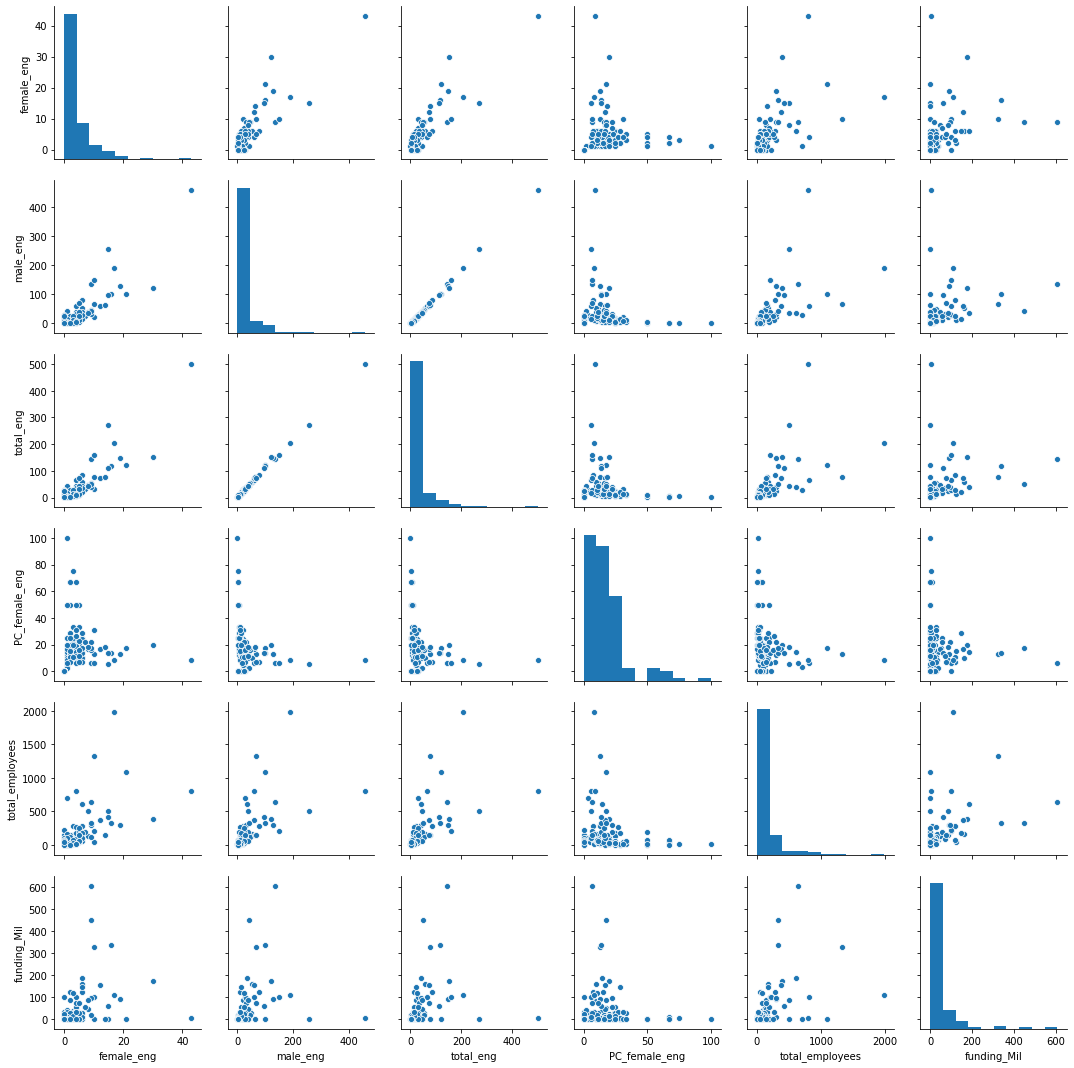

In [27]:
# Creating a pair plot to see any interesting findings
sns.pairplot(tech)

#### Findings

In [28]:
# Percentage of Male Engineers
tech['PC_male_eng'] = tech['male_eng']/tech['total_eng'] * 100
tech

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
0,37signals,0,20,20,0.00,20.0,IL,0.00,Software,100.000000
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,95.238095
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,96.666667
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,80.000000
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,86.842105
...,...,...,...,...,...,...,...,...,...,...
116,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit,93.243243
117,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion,33.333333
118,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web,91.747573
119,Zendesk,8,37,45,17.78,500.0,CA,85.50,Enterprise,82.222222


In [29]:
# Rounding upto 2 points after decimal
tech.round({'PC_male_eng':2})

,Company,female_eng,male_eng,total_eng,PC_female_eng,total_employees,Location,funding_Mil,Category,PC_male_eng
0,37signals,0,20,20,0.00,20.0,IL,0.00,Software,100.00
1,7digital,1,20,21,4.76,120.0,London,18.50,Consumer Web,95.24
2,Activision,1,29,30,3.33,706.0,CA,0.00,Games/Entertainment,96.67
3,Adzerk,1,4,5,20.00,9.0,NC,0.65,Advertising,80.00
4,Airbnb,10,66,76,13.16,1324.0,CA,326.00,Consumer Web,86.84
...,...,...,...,...,...,...,...,...,...,...
116,Wikimedia Foundation,5,69,74,6.76,143.0,CA,74.00,Charity/Nonprofit,93.24
117,Yellowsmith,2,1,3,66.67,5.0,NY,0.85,eCommerce/Fashion,33.33
118,Yelp,17,189,206,8.25,1984.0,CA,107.00,Consumer Web,91.75
119,Zendesk,8,37,45,17.78,500.0,CA,85.50,Enterprise,82.22


### 3.3 Data Visualization

### 3.3.1 Visualization of the Total Number of Female and Male Employees

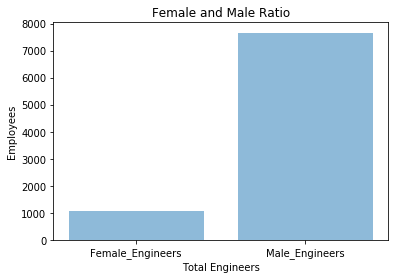

In [30]:
objects = ('Female_Engineers', 'Male_Engineers')
y_pos = np.arange(len(objects))
performance = [1076,7661]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Total Engineers')
plt.ylabel('Employees')
plt.title('Female and Male Ratio')

plt.show()

### Calculating the Sums of Female Engineers, Male Engineers, Total Number of Engineers and Total Employees

In [31]:
tech.sum(axis=0, skipna=True)

Company            37signals7digitalActivisionAdzerkAirbnbappssav...
female_eng                                                       523
male_eng                                                        3754
total_eng                                                       4277
PC_female_eng                                                2009.37
total_employees                                                19128
funding_Mil                                                  4941.22
Category           SoftwareConsumer WebGames/EntertainmentAdverti...
PC_male_eng                                                  10090.6
dtype: object

In [32]:
Female_Engineers = tech.female_eng.sum(axis=0, skipna=True)
Female_Engineers

523

In [33]:
Male_Engineers = tech.male_eng.sum(axis=0, skipna=True)
Male_Engineers

3754

In [34]:
Total_Engineers = tech.total_eng.sum(axis=0, skipna=True)
Total_Engineers

4277

### Female Engineers per Company Category

In [35]:
# The number of female engineers in each category.
tech.groupby('Category').sum()

,female_eng,male_eng,total_eng,PC_female_eng,total_employees,funding_Mil,PC_male_eng
Category,,,,,,,
Advertising,28,165,193,155.40,871.0,90.690,644.595758
Analytics/Big Data,9,53,62,50.95,218.0,70.500,249.055829
Charity/Nonprofit,9,94,103,64.76,266.0,91.900,235.243243
Consulting,12,62,74,62.41,120.0,0.000,237.590188
Consumer Web,174,1309,1483,525.58,6610.0,1392.250,2274.409793
Education,20,151,171,209.96,865.0,210.117,890.039683
Enterprise,28,171,199,103.69,1010.0,170.550,696.313131
Finance/Venture,13,55,68,81.60,521.0,99.100,318.397436
Games/Entertainment,1,29,30,3.33,706.0,0.000,96.666667


In [36]:
female_eng_byCategory = tech.groupby('Category').sum()['female_eng']
female_eng_byCategory

Category
Advertising             28
Analytics/Big Data       9
Charity/Nonprofit        9
Consulting              12
Consumer Web           174
Education               20
Enterprise              28
Finance/Venture         13
Games/Entertainment      1
Hardware                16
Health/CleanTech        21
Mobile/Wireless         14
News/Media              14
Social Networking       33
Software                93
eCommerce/Fashion       38
Name: female_eng, dtype: int64

In [37]:
total_eng_byCategory = tech.groupby('Category').sum()['total_eng']
total_eng_byCategory

Category
Advertising             193
Analytics/Big Data       62
Charity/Nonprofit       103
Consulting               74
Consumer Web           1483
Education               171
Enterprise              199
Finance/Venture          68
Games/Entertainment      30
Hardware                280
Health/CleanTech        116
Mobile/Wireless         161
News/Media              111
Social Networking       254
Software                747
eCommerce/Fashion       225
Name: total_eng, dtype: int64

In [38]:
percentage = female_eng_byCategory/total_eng_byCategory*100
percentage

Category
Advertising            14.507772
Analytics/Big Data     14.516129
Charity/Nonprofit       8.737864
Consulting             16.216216
Consumer Web           11.732974
Education              11.695906
Enterprise             14.070352
Finance/Venture        19.117647
Games/Entertainment     3.333333
Hardware                5.714286
Health/CleanTech       18.103448
Mobile/Wireless         8.695652
News/Media             12.612613
Social Networking      12.992126
Software               12.449799
eCommerce/Fashion      16.888889
dtype: float64

In [39]:
# The percentage of female engineers sorted by the value
percentage.sort_values(ascending=False)

Category
Finance/Venture        19.117647
Health/CleanTech       18.103448
eCommerce/Fashion      16.888889
Consulting             16.216216
Analytics/Big Data     14.516129
Advertising            14.507772
Enterprise             14.070352
Social Networking      12.992126
News/Media             12.612613
Software               12.449799
Consumer Web           11.732974
Education              11.695906
Charity/Nonprofit       8.737864
Mobile/Wireless         8.695652
Hardware                5.714286
Games/Entertainment     3.333333
dtype: float64

In [40]:
# Top company categories with female engineers
percentage.sort_values(ascending=False).head(3)

Category
Finance/Venture      19.117647
Health/CleanTech     18.103448
eCommerce/Fashion    16.888889
dtype: float64

In [41]:
# Bottom company categories with female engineers
percentage.sort_values(ascending=True).head(3)

Category
Games/Entertainment    3.333333
Hardware               5.714286
Mobile/Wireless        8.695652
dtype: float64

#### Findings
_Rami Comment: These findings can be moved to chapter 4. Analysis._

As can be found from the data the top 3 company categories with the highest percentage of female engineers are:

- Finance/Venture 19.12 %
- Health/CleanTech 18.10 % 
- eCommerce/Fashion 16.89 %

The company categories with the lowest percentage of female engineers are as follows:

- Games/Entertainment 3.33 %
- Hardware 5.71 %
- Mobile/Wireless 8.7 %

It its worth noting the low percentage of female engineers in the Games/Entertainment category.

### Correlation Matrix of Employees (Female, Male, Total) and Funding

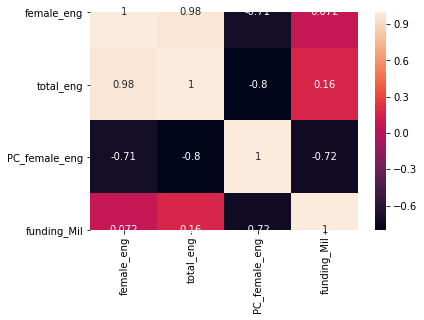

In [42]:
# Use Seaborn's heatmap to plot the correlation matrix of employees and fundings
corr_tech = tech[['female_eng','total_eng','PC_female_eng', 'funding_Mil']].corr()
corr_heatmap = sns.heatmap(corr_tech.corr(), annot=True)

### 3.4 Machine Learning

### Using K-Means to Predict Company Categories

In [43]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [44]:
# The column 'PC_female_eng' is 'X'
X = tech.iloc[:, [5]]

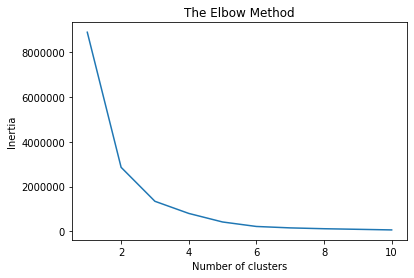

In [45]:
# Using the Elbow method to find the optinal number of clusters
inertias = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

As the above figure shows, the number of clusters should be 3. 

In [46]:
# Applying k-means to the tech dataset
kmeans = KMeans(n_clusters = 3)

# Fitting
y_kmeans = kmeans.fit_predict(X)

# Prediction
prediction = kmeans.predict(X)
print(prediction)

[0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0
 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 2 0]


In [49]:
# Visualising the clusters

# Making a scatter plot of Xs and y_kmeans
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')

# Asign the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

# Plotting clusters
plt.title('Clusters of Percentage of Female Engineers by Category')
plt.xlabel('Clusters of Female Engineers')
plt.ylabel('Categories')
plt.legend()
plt.show()

TypeError: '(array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True]), 0)' is an invalid key

In [50]:
centroids

NameError: name 'centroids' is not defined

## 4. Analysis

_Instructions from Final_Project.pdf:_
- Summarize the results of the analysis without discussing
their implications

## 5. Conclusion

_Instructions from Final_Project.pdf:_
- Interpret and explain your results
- Did the study answer your questions?

## 6. References